# About Dataset

**Context**
* Stars mostly form in clusters and associations rather than in isolation. Milky Way star clusters are easily observable with small telescopes, and in some cases even with the naked eye. Depending on a variety of conditions, star clusters may dissolve quickly or be very long lived.
* The dynamical evolution of star clusters is a topic of very active research in astrophysics. Some popular models of star clusters are the so-called direct N-body simulations [1, 2], where every star is represented by a point particle that interacts gravitationally with every other particle. This kind of simulation is computationally expensive, as it scales as O(N^2) where N is the number of particles in the simulated cluster. In the following, the words "particle" and "star" are used interchangeably.


**Analysis Content**
* 1.Python Libraries
* 2.data loading
* 3.EDA
* 4.data Preprocessing
* 5.K-MEANS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage

import warnings
warnings.filterwarnings('ignore')

In [2]:
star = pd.read_csv("C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\\Kaggle data set\\c_0000.csv")

***EDA***

In [3]:
star.head()

,x,y,z,vx,vy,vz,m,id
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016,1
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016,2
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016,3
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016,4
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016,5


* Let's remove the id column

In [4]:
star =star.drop("id",axis = 1)

In [5]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       64000 non-null  float64
 1   y       64000 non-null  float64
 2   z       64000 non-null  float64
 3   vx      64000 non-null  float64
 4   vy      64000 non-null  float64
 5   vz      64000 non-null  float64
 6   m       64000 non-null  float64
dtypes: float64(7)
memory usage: 3.4 MB


In [6]:
star.shape

(64000, 7)

In [7]:
star.describe().T

,count,mean,std,min,25%,50%,75%,max
x,64000.0,-1.176596e-10,7.807475e-01,-4.698981,-0.334822,-0.000482,0.334706,5.401047
y,64000.0,3.412734e-10,7.814718e-01,-5.095714,-0.336613,-0.000432,0.332101,5.680950
z,64000.0,2.464757e-10,7.719907e-01,-5.015129,-0.335628,-0.003949,0.330509,4.762590
vx,64000.0,1.101956e-10,4.088337e-01,-1.619203,-0.269740,-0.000209,0.269114,1.547319
vy,64000.0,2.103394e-10,4.078873e-01,-1.482613,-0.271454,0.001419,0.270754,1.584202
vz,64000.0,1.820625e-11,4.080323e-01,-1.685246,-0.270982,0.000177,0.270055,1.600681
m,64000.0,1.562500e-05,2.483520e-17,0.000016,0.000016,0.000016,0.000016,0.000016


***Data Preprocessing***

In [8]:
#missing values analysis
star.isnull().sum()

x     0
y     0
z     0
vx    0
vy    0
vz    0
m     0
dtype: int64

**outlier problem**

In [9]:
for i in star:
    Q1 = star[i].quantile(0.25)
    Q3 = star[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if star[(star[i] > up) | (star[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

x yes
y yes
z yes
vx yes
vy yes
vz yes
m no


In [10]:
#There are outliers in other variables except m, lets fix them:
for i in star:
    Q1 = star[i].quantile(0.25)
    Q3 = star[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    star.loc[star[i] > up_lim,i] = up_lim
    star.loc[star[i] < low_lim,i] = low_lim


In [11]:
#Outlier Query
for i in star:
    Q1 = star[i].quantile(0.25)
    Q3 = star[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if star[(star[i] > up) | (star[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

x no
y no
z no
vx no
vy no
vz no
m no


* We have eliminated outliers.We followed this path;We have replaced the values ​​below the lower limit with the lower limit, and the values above the upper limit with the upper limit....

**data visualization**

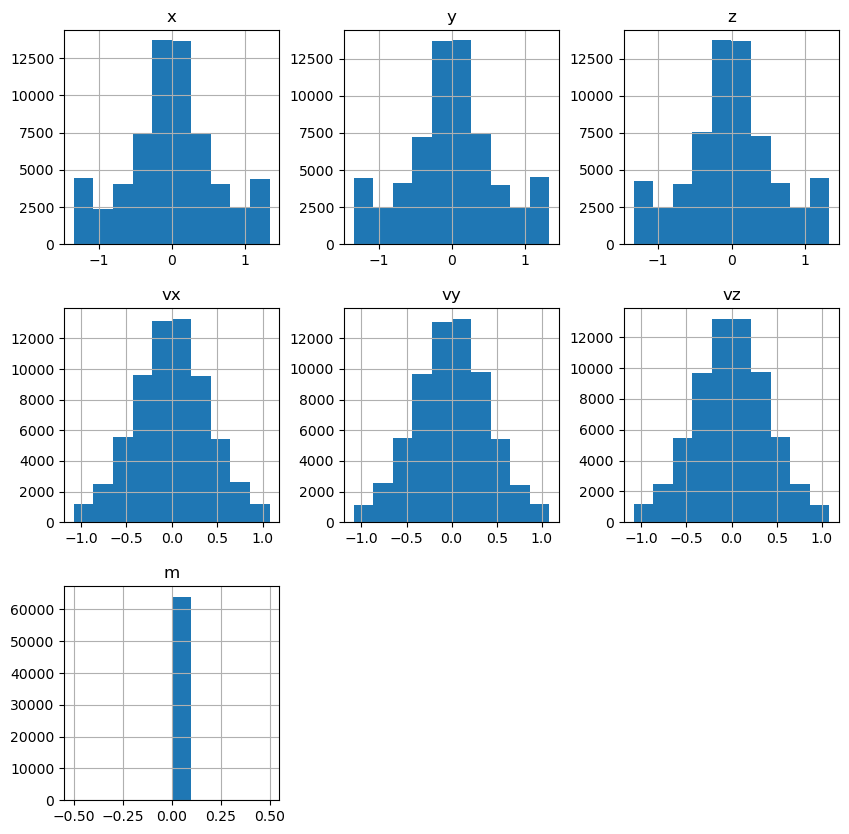

In [12]:
star.hist(figsize =(10,10))
plt.show()

**Correlation Analysis**

In [13]:
corrl= star.corr()

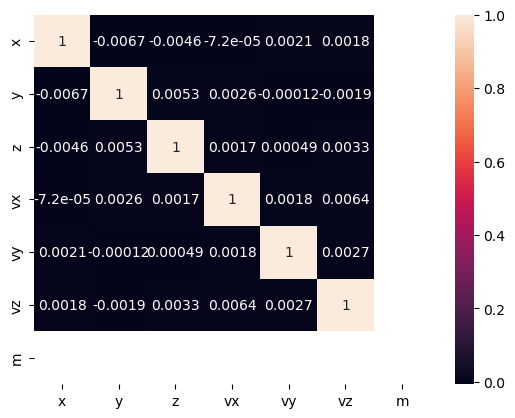

In [14]:
sns.heatmap(corrl,annot=True)
plt.show()

* We understand from the correlation graph that;There is no correlation between any of the variables.

# 5. K-MEANS

In [15]:
kmeans=KMeans().fit(star)

In [18]:
score=[]
K=range(1,20)

for i in K:
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(star)
    score.append(kmeans.inertia_)

In [19]:
!pip install yellowbrick

In [20]:
from yellowbrick.cluster import KElbowVisualizer

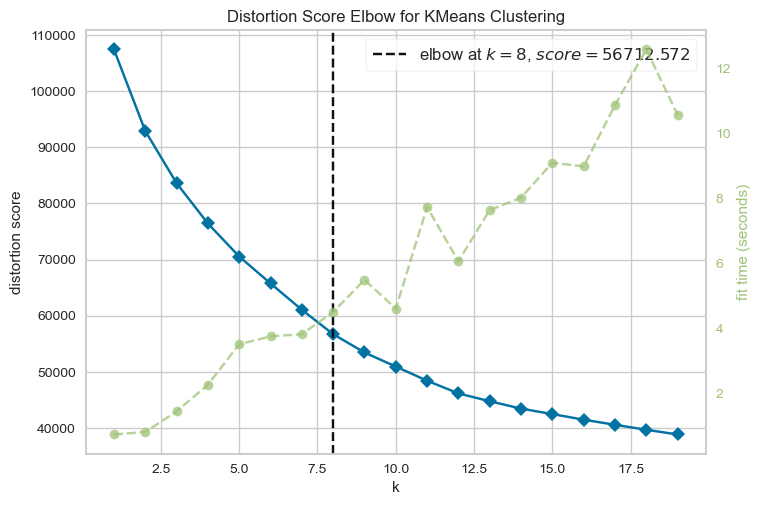

In [21]:
kmeans=KMeans()
visu=KElbowVisualizer(kmeans,k=(1,20))   
visu.fit(star)
visu.poof();

* we made a smoother operation,thus giving the optimum value of k as 8.We will divide it into 8 sets...

In [23]:
# final model
kmeans=KMeans(n_clusters=8,init="k-means++").fit(star)

In [24]:
cluster=kmeans.labels_
cluster

array([7, 1, 6, ..., 1, 5, 4])

In [25]:
star["cluster number"]=cluster
star.head(10)

,x,y,z,vx,vy,vz,m,cluster number
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016,7
1,-0.065961,0.080844,-0.276031,-0.575780,1.084068,-0.293408,0.000016,1
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016,6
3,1.338998,1.335174,1.329715,-0.090266,0.326612,-0.310594,0.000016,2
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016,6
5,-0.356017,-0.045705,0.335006,-0.709008,-0.649903,0.397949,0.000016,6
6,-0.397190,-1.339686,-0.757772,0.041345,0.718185,0.422623,0.000016,4
7,-0.916657,0.643472,-0.146350,-0.511860,0.220190,-0.529937,0.000016,0
8,1.338998,0.790756,0.290989,0.292099,0.053339,-0.472290,0.000016,2
9,-0.976209,0.445163,-0.705493,-0.120242,-0.231255,-0.227857,0.000016,0


In [26]:
#let's find the centers
centers=kmeans.cluster_centers_
centers

array([[-6.24623092e-01,  5.74790000e-01, -7.87681031e-01,
         1.75506452e-03, -1.00173176e-02,  6.67709578e-03,
         1.56250010e-05],
       [ 4.51268572e-03, -1.21224417e-03, -2.54304436e-04,
         2.95240709e-01,  2.49380040e-01,  1.46265015e-01,
         1.56250010e-05],
       [ 8.29665099e-01,  8.11827562e-01, -7.93770866e-02,
        -4.16945494e-03, -8.61656479e-03, -4.68899771e-03,
         1.56250010e-05],
       [ 6.13221026e-01, -5.88703912e-01,  8.04934013e-01,
        -1.31987065e-03, -1.52195480e-03,  1.03868022e-02,
         1.56250010e-05],
       [-8.36960425e-01, -8.15601301e-01,  6.36721365e-02,
        -2.69961061e-04, -1.02450578e-02,  5.79284062e-03,
         1.56250010e-05],
       [-5.53711906e-01,  6.46031306e-01,  7.93513420e-01,
         3.97879839e-03,  2.80394083e-03, -1.01629845e-03,
         1.56250010e-05],
       [-3.01546856e-03, -3.61370164e-04, -9.59407370e-03,
        -2.89172730e-01, -2.33287577e-01, -1.48311189e-01,
         1.5625001

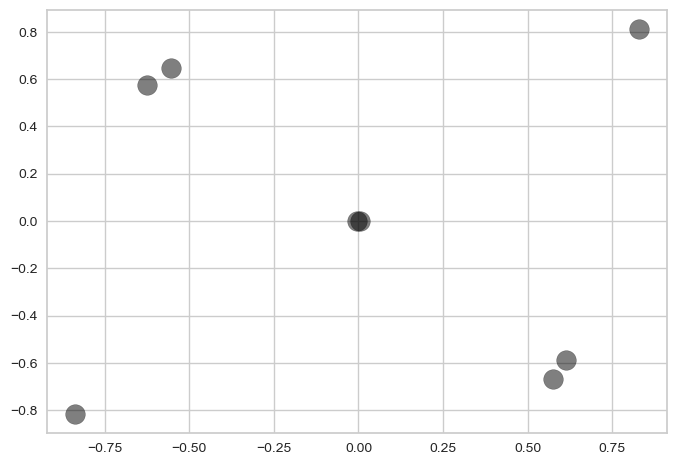

In [27]:
# Let's look at the locations of the centers
# merkezlerin konumarına bakalım

plt.scatter(centers[:,0],centers[:,1],c="black",s=200,alpha=0.5);

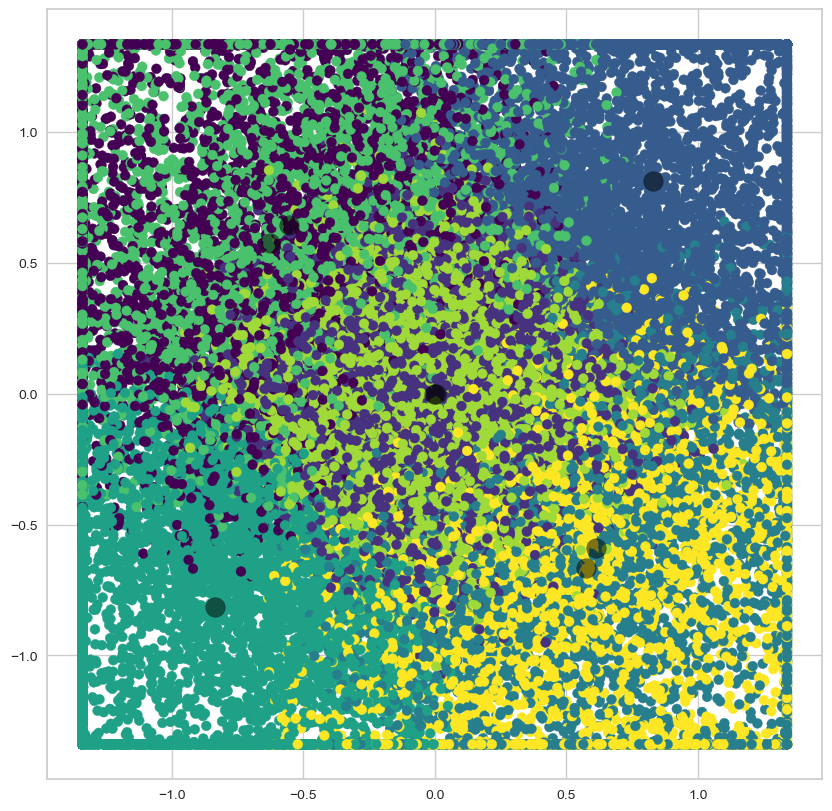

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(star.iloc[:,0],star.iloc[:,1],c=cluster,s=50,cmap="viridis")
plt.scatter(centers[:,0],centers[:,1],c="black",s=200,alpha=0.5);